Mimicdataset-Regression models- SMOTE AND STRATIFIED SAMPLING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/iupui-soic/handson-ml-mimic-iv.git

Cloning into 'handson-ml-mimic-iv'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 83 (delta 29), reused 40 (delta 13), pack-reused 0
Receiving objects: 100% (83/83), 3.86 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [3]:
%cd handson-ml-mimic-iv

/content/handson-ml-mimic-iv


In [4]:
!cp /content/drive/MyDrive/Mimic.py .


'anchor_age', 'gender', 'drug', 'race', 'careunit', 'icd_code', 'los'- inlcuded all these columns along with hospital expire flag

In [6]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/mimicdata.csv'
df = pd.read_csv(file_path)
# Load the dataset with low_memory=False to avoid DtypeWarning
df = pd.read_csv(file_path, low_memory=False)

# Select the required columns including LOS, care unit, race, drug name, gender, age, ICD code, and hospital expire flag
selected_columns = [
    'anchor_age', 'gender', 'drug', 'race', 'careunit',
    'icd_code', 'hospital_expire_flag'
]

# Calculate Length of Stay (LOS) in days
df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')
df['dischtime'] = pd.to_datetime(df['dischtime'], errors='coerce')
df['los'] = (df['dischtime'] - df['admittime']).dt.days

# Add LOS to the selected columns list
selected_columns.append('los')

# Filter the DataFrame to include only the selected columns
df_selected = df[selected_columns]

# Save the filtered DataFrame to a new CSV file
output_file_path = 'filtered_mimicdata.csv'
df_selected.to_csv(output_file_path, index=False)

# Display the first 5 rows of the filtered DataFrame
print(df_selected.head())

print(f"Filtered data saved to {output_file_path}")


<ipython-input-6-d1e844a98ce5>:5: DtypeWarning: Columns (57,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


   anchor_age gender                         drug   race  \
0          52      F                Acetaminophen  WHITE   
1          52      F  Sodium Chloride 0.9%  Flush  WHITE   
2          52      F                   Furosemide  WHITE   
3          52      F                  Raltegravir  WHITE   
4          19      F                      Heparin  WHITE   

               careunit icd_code  hospital_expire_flag  los  
0  Emergency Department     5723                     0    0  
1            Transplant    78959                     0    1  
2                   NaN     5715                     0    1  
3                   NaN    07070                     0    2  
4            Transplant      496                     0    0  
Filtered data saved to filtered_mimicdata.csv


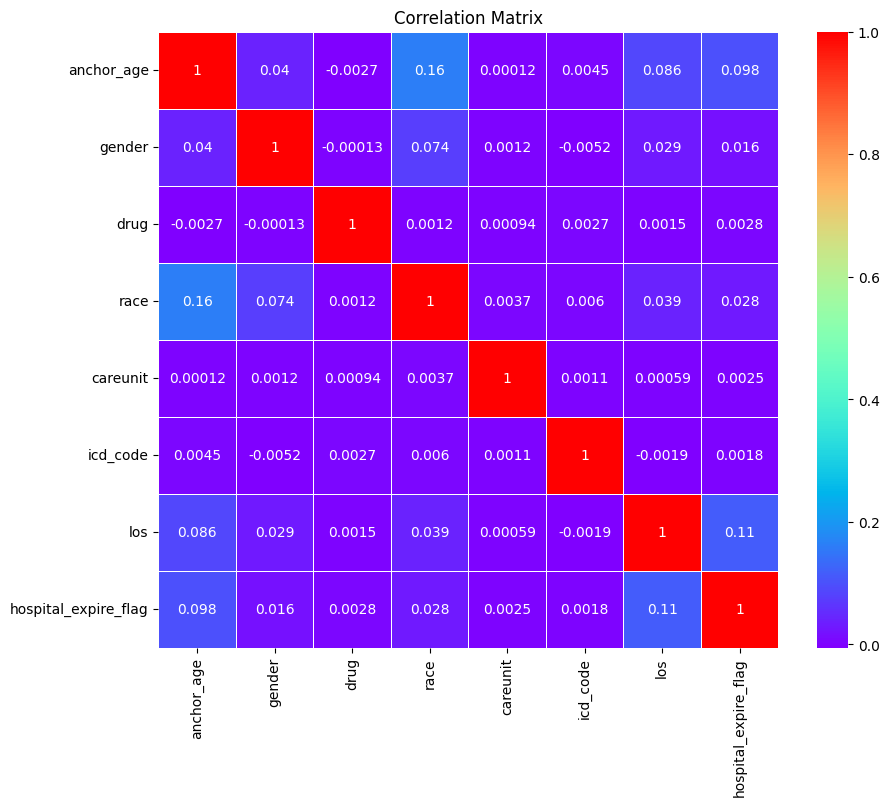

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'filtered_mimicdata.csv'
df = pd.read_csv(file_path)

# Define features and target
features = ['anchor_age', 'gender', 'drug', 'race', 'careunit', 'icd_code', 'los']
target = 'hospital_expire_flag'

# Encode categorical features
label_encoders = {}
for col in ['gender', 'drug', 'race', 'careunit', 'icd_code']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Calculate the correlation matrix
corr_matrix = df[features + [target]].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Analysis Steps

- **Identify Target and Features:**
  - Target Variable: `hospital_expire_flag`
  - Features: `anchor_age`, `gender`, `drug`, `race`, `careunit`, `icd_code`, `los`

- **Encode Categorical Features:**
  - Used `LabelEncoder` to convert categorical features into numerical values.

- **Split Features and Target Variable:**
  - Separated the features and target variable for analysis.

- **Address Class Imbalance:**
  - Applied `SMOTE` to balance the classes.
  - Resulted in a balanced dataset.
  - Saved the resampled dataset as `resampled_mimicdata.csv`.

- **Preprocess Data:**
  - Used `ColumnTransformer` to:
    - Standardize numeric features.
    - One-hot encode categorical features.

- **Define Models:**
  - Linear Regression
  - Ridge Regression

- **Train and Evaluate Models:**
  - Used a stratified sampling approach to maintain class proportions.
  - Trained the models using the stratified sampled data.
  - Evaluated models using 5-fold cross-validation.
  - Tested models to predict the target variable on the test set.


Import Libraries and Load Dataset
python


In [8]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from joblib import dump

# Load the dataset
file_path = 'filtered_mimicdata.csv'
df = pd.read_csv(file_path)


Define Features and Target, Encode Categorical Features
python


In [9]:
# Define features and target
features = ['anchor_age', 'gender', 'drug', 'race', 'careunit', 'icd_code', 'los']
target = 'hospital_expire_flag'

# Encode categorical features
label_encoders = {}
for col in ['gender', 'drug', 'race', 'careunit', 'icd_code']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Split Features and Target, Apply SMOTE

In [10]:
# Split features and target
X = df[features]
y = df[target]

# Apply SMote to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check the distribution after applying SMOTE
print("Target variable distribution after SMOTE:")
print(y_res.value_counts())

# Save the resampled dataset to a new CSV file
resampled_df = pd.concat([X_res, y_res], axis=1)
resampled_df.to_csv('resampled_mimicdata.csv', index=False)


Target variable distribution after SMOTE:
hospital_expire_flag
0    422622
1    422622
Name: count, dtype: int64


Define Preprocessor and Models-PIPELINES

In [11]:
# Define preprocessor for numeric and categorical features
numeric_features = ['anchor_age', 'los']
categorical_features = ['gender', 'drug', 'race', 'careunit', 'icd_code']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0)
}


Split Data Based on Race and Train Models

In [12]:
# Split data based on race into separate strata
unique_races = df['race'].unique()

for race in unique_races:
    print(f"\nModeling for race: {race}")
    race_mask = X_res['race'] == race
    X_race = X_res[race_mask]
    y_race = y_res[race_mask]

    if len(X_race) < 10:
        print(f"Skipping race {race} due to insufficient data.")
        continue

    # Perform stratified sampling within each race stratum
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in stratified_split.split(X_race, y_race):
        X_train, X_test = X_race.iloc[train_index], X_race.iloc[test_index]
        y_train, y_test = y_race.iloc[train_index], y_race.iloc[test_index]

    # Train and evaluate models within each race stratum
    for model_name, model in models.items():
        # Create a pipeline with preprocessing and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Evaluate the model using cross-validation
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_mse = -cv_scores.mean()

        # Predict on the test set
        y_pred = pipeline.predict(X_test)

        # Calculate metrics
        train_mse = mean_squared_error(y_train, pipeline.predict(X_train))
        train_r2 = r2_score(y_train, pipeline.predict(X_train))
        test_mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)

        print(f"{model_name} - CV Mean Squared Error: {cv_mse}")
        print(f"{model_name} - Train MSE: {train_mse}")
        print(f"{model_name} - Train R2: {train_r2}")
        print(f"{model_name} - Test MSE: {test_mse}")
        print(f"{model_name} - Test R2: {test_r2}")

        # Save the model
        model_filename = f"{model_name.lower()}_model_race_{race}.pkl"
        dump(pipeline, model_filename)



Modeling for race: 28
LinearRegression - CV Mean Squared Error: 0.09941098264537578
LinearRegression - Train MSE: 0.08973148291642381
LinearRegression - Train R2: 0.6238166979415065
LinearRegression - Test MSE: 0.09856461587084793
LinearRegression - Test R2: 0.5867862210510298
Ridge - CV Mean Squared Error: 0.09747549371557393
Ridge - Train MSE: 0.08999744261019939
Ridge - Train R2: 0.6227017091709304
Ridge - Test MSE: 0.09705312498525073
Ridge - Test R2: 0.5931228648371014

Modeling for race: 22
LinearRegression - CV Mean Squared Error: 0.11918048176258092
LinearRegression - Train MSE: 0.05363757750977411
LinearRegression - Train R2: 0.7734339547125586
LinearRegression - Test MSE: 0.10688008150328179
LinearRegression - Test R2: 0.5485506872364522
Ridge - CV Mean Squared Error: 0.10004550563626295
Ridge - Train MSE: 0.06066107111617035
Ridge - Train R2: 0.7437665975278899
Ridge - Test MSE: 0.09333437743820605
Ridge - Test R2: 0.6057662011569676

Modeling for race: 7
LinearRegression -

| Race ID | Race Description                                    | Model             | CV Mean Squared Error | Train MSE         | Train R2        | Test MSE         | Test R2         |
|---------|-----------------------------------------------------|-------------------|-----------------------|-------------------|-----------------|------------------|-----------------|
| 28      | WHITE                                               | Linear Regression | 0.0994                | 0.0897            | 0.6238          | 0.0986           | 0.5868          |
| 28      | WHITE                                               | Ridge             | 0.0975                | 0.0900            | 0.6227          | 0.0971           | 0.5931          |
| 22      | OTHER                                               | Linear Regression | 0.1192                | 0.0536            | 0.7734          | 0.1069           | 0.5486          |
| 22      | OTHER                                               | Ridge             | 0.1000                | 0.0607            | 0.7438          | 0.0933           | 0.6058          |
| 7       | BLACK/AFRICAN AMERICAN                              | Linear Regression | 0.0651                | 0.0410            | 0.6424          | 0.0642           | 0.4401          |
| 7       | BLACK/AFRICAN AMERICAN                              | Ridge             | 0.0596                | 0.0434            | 0.6215          | 0.0597           | 0.4792          |
| 26      | UNABLE TO OBTAIN                                    | Linear Regression | 0.0779                | 0.0281            | 0.6340          | 0.0741           | 0.0344          |
| 26      | UNABLE TO OBTAIN                                    | Ridge             | 0.0609                | 0.0331            | 0.5695          | 0.0606           | 0.2112          |
| 27      | UNKNOWN                                             | Linear Regression | 0.0640                | 0.0484            | 0.4046          | 0.0625           | 0.2310          |
| 27      | UNKNOWN                                             | Ridge             | 0.0606                | 0.0493            | 0.3935          | 0.0598           | 0.2647          |
| 32      | WHITE - RUSSIAN                                     | Linear Regression | 0.0459                | 0.0145            | 0.6568          | **<span style="color:red">0.0360</span>**       | **<span style="color:red">0.1413</span>**      |
| 32      | WHITE - RUSSIAN                                     | Ridge             | 0.0361                | 0.0176            | 0.5836          | **<span style="color:red">0.0306</span>**       | **<span style="color:red">0.2700</span>**      |
| 24      | PORTUGUESE                                          | Linear Regression | 0.1106                | 0.0270            | 0.7659          | 0.1040           | 0.1006          |
| 24      | PORTUGUESE                                          | Ridge             | 0.0769                | 0.0357            | 0.6909          | 0.0737           | 0.3625          |
| 31      | WHITE - OTHER EUROPEAN                              | Linear Regression | 0.0914                | 0.0316            | 0.8379          | 0.0906           | 0.5356          |
| 31      | WHITE - OTHER EUROPEAN                              | Ridge             | 0.0794                | 0.0405            | 0.7925          | 0.0784           | 0.5979          |
| 8       | BLACK/CAPE VERDEAN                                  | Linear Regression | 0.1545                | 0.0405            | 0.8377          | 0.1540           | 0.3823          |
| 8       | BLACK/CAPE VERDEAN                                  | Ridge             | 0.1175                | 0.0543            | 0.7821          | 0.1173           | 0.5297          |
| 1       | ASIAN                                               | Linear Regression | 0.0839                | 0.0249            | 0.8102          | 0.0806           | 0.3849          |
| 1       | ASIAN                                               | Ridge             | 0.0698                | 0.0328            | 0.7500          | 0.0713           | 0.4558          |
| 3       | ASIAN - CHINESE                                     | Linear Regression | 0.1041                | 0.0256            | 0.8513          | 0.1125           | 0.3470          |
| 3       | ASIAN - CHINESE                                     | Ridge             | 0.0884                | 0.0378            | 0.7808          | 0.0941           | 0.4540          |
| 14      | HISPANIC/LATINO - DOMINICAN                         | Linear Regression | 0.1395                | 0.0280            | 0.8880          | 0.1410           | 0.4361          |
| 14      | HISPANIC/LATINO - DOMINICAN                         | Ridge             | 0.0997                | 0.0419            | 0.8325          | 0.0995           | 0.6021          |
| 19      | HISPANIC/LATINO - SALVADORAN                        | Linear Regression | 0.1181                | 0.0150            | 0.8798          | 0.1031           | 0.1755          |
| 19      | HISPANIC/LATINO - SALVADORAN                        | Ridge             | 0.0694                | 0.0259            | 0.7925          | 0.0670           | 0.4645          |
| 18      | HISPANIC/LATINO - PUERTO RICAN                      | Linear Regression | 0.1237                | 0.0392            | 0.8370          | 0.1194           | 0.5029          |
| 18      | HISPANIC/LATINO - PUERTO RICAN                      | Ridge             | 0.0981                | 0.0493            | 0.7949          | 0.0959           | 0.6008          |
| 15      | HISPANIC/LATINO - GUATEMALAN                        | Linear Regression | 0.1530                | 0.0191            | 0.8912          | 0.1484           | 0.1556          |
| 15      | HISPANIC/LATINO - GUATEMALAN                        | Ridge             | 0.0922                | 0.0335            | 0.8093          | 0.0863           | 0.5092          |
| 5       | ASIAN - SOUTH EAST ASIAN                            | Linear Regression | 0.2250                | 0.0156            | 0.9366          | 0.1718           | 0.3027          |
| 5       | ASIAN - SOUTH EAST ASIAN                            | Ridge             | 0.1221                | 0.0370            | 0.8498          | 0.1029           | 0.5821          |
| 29      | WHITE - BRAZILIAN                                   | Linear Regression | 0.0763                | 0.0123            | 0.8992          | 0.0727           | 0.4040          |
| 29      | WHITE - BRAZILIAN                                   | Ridge             | 0.0497                | 0.0198            | 0.8370          | 0.0446           | 0.6338          |
| 10      | HISPANIC OR LATINO                                  | Linear Regression | 0.1199                | 0.0350            | 0.8485          | 0.1107           | 0.5204          |
| 10      | HISPANIC OR LATINO                                  | Ridge             | 0.0918                | 0.0447            | 0.8061          | 0.0911           | 0.6052          |
| 6       | BLACK/AFRICAN                                       | Linear Regression | 0.1446                | 0.0233            | 0.9063          | 0.1518           | 0.3896          |
| 6       | BLACK/AFRICAN                                       | Ridge             | 0.1048                | 0.0390            | 0.8430          | 0.1082           | 0.5648          |
| 21      | NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER           | Linear Regression | 0.0949                | 0.0109            | 0.8100          | 0.0774           | -0.3491         |
| 21      | NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER           | Ridge             | 0.0504                | 0.0186            | 0.6740          | 0.0472           | 0.1774          |
| 9       | BLACK/CARIBBEAN ISLAND                              | Linear Regression | 0.1723                | 0.0335            | 0.8589          | 0.1699           | 0.2839          |
| 9       | BLACK/CARIBBEAN ISLAND                              | Ridge             | 0.1211                | 0.0502            | 0.7883          | 0.1175           | 0.5049          |
| 17      | HISPANIC/LATINO - MEXICAN                           | Linear Regression | 0.1232                | 0.0093            | 0.9154          | 0.1131           | -0.0309         |
| 17      | HISPANIC/LATINO - MEXICAN                           | Ridge             | 0.0610                | 0.0203            | 0.8157          | 0.0560           | 0.4900          |
| 23      | PATIENT DECLINED TO ANSWER                          | Linear Regression | 0.1226                | 0.0306            | 0.7702          | 0.1103           | 0.1725          |
| 23      | PATIENT DECLINED TO ANSWER                          | Ridge             | 0.0849                | 0.0399            | 0.7008          | 0.0832           | 0.3760          |
| 13      | HISPANIC/LATINO - CUBAN                             | Linear Regression | 0.1461                | 0.0115            | 0.8761          | 0.1157           | -0.2438         |
| 13      | HISPANIC/LATINO - CUBAN                             | Ridge             | 0.0694                | 0.0233            | 0.7500          | 0.0702           | 0.2449          |
| 0       | AMERICAN INDIAN/ALASKA NATIVE                       | Linear Regression | 0.0794                | 0.0008            | 0.9888          | 0.0463           | 0.3789          |
| 0       | AMERICAN INDIAN/ALASKA NATIVE                       | Ridge             | 0.0449                | 0.0092            | 0.8755          | 0.0336           | 0.5495          |
| 20      | MULTIPLE RACE/ETHNICITY                             | Linear Regression | 0.0995                | 0.0101            | 0.8817          | 0.0908           | -0.0679         |
| 20      | MULTIPLE RACE/ETHNICITY                             | Ridge             | 0.0547                | 0.0190            | 0.7774          | 0.0533           | 0.3728          |
| 30      | WHITE - EASTERN EUROPEAN                            | Linear Regression | 0.1230                | 0.0169            | 0.8747          | 0.1174           | 0.1287          |
| 30      | WHITE - EASTERN EUROPEAN                            | Ridge             | 0.0767                | 0.0295            | 0.7811          | 0.0732           | 0.4566          |
| 4       | ASIAN - KOREAN                                      | Linear Regression | 0.2780                | 0.0028            | 0.9850          | 0.1918           | -0.0127         |
| 4       | ASIAN - KOREAN                                      | Ridge             | 0.0943                | 0.0225            | 0.8810          | 0.0825           | 0.5642          |
| 16      | HISPANIC/LATINO - HONDURAN                          | Linear Regression | 0.1221                | 0.0113            | 0.8801          | 0.1102           | -0.1673         |
| 16      | HISPANIC/LATINO - HONDURAN                          | Ridge             | 0.0637                | 0.0221            | 0.7671          | 0.0604           | 0.3605          |
| 2       | ASIAN - ASIAN INDIAN                                | Linear Regression | 0.1868                | 0.0108            | 0.9559          | 0.1701           | 0.3060          |
| 2       | ASIAN - ASIAN INDIAN                                | Ridge             | 0.1129                | 0.0309            | 0.8741          | 0.1199           | 0.5109          |
| 12      | HISPANIC/LATINO - COLUMBIAN                         | Linear Regression | 0.1453                | 0.0126            | 0.8861          | 0.1062           | 0.0423          |
| 12      | HISPANIC/LATINO - COLUMBIAN                         | Ridge             | 0.0715                | 0.0252            | 0.7716          | 0.0704           | 0.3654          |
| 11      | HISPANIC/LATINO - CENTRAL AMERICAN                  | Linear Regression | 0.1321                | 0.0093            | 0.8852          | 0.1054           | -0.3017         |
| 11      | HISPANIC/LATINO - CENTRAL AMERICAN                  | Ridge             | 0.0618                | 0.0207            | 0.7445          | 0.0613           | 0.2434          |
| 25      | SOUTH AMERICAN                                      | Linear Regression | 0.0610                | 0.0139            | 0.7013          | 0.0547           | -0.1796         |
| 25      | SOUTH AMERICAN                                      | Ridge             | 0.0410                | 0.0186            | 0.5989          | 0.0402           | 0.1340          |


LOGISTIC REGRESSION,ROC,CONFUSION MATRIX-without stratum

Target variable distribution after SMOTE:
hospital_expire_flag
0    422622
1    422622
Name: count, dtype: int64


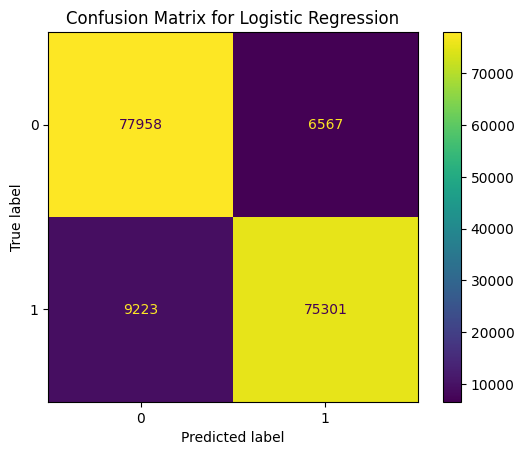

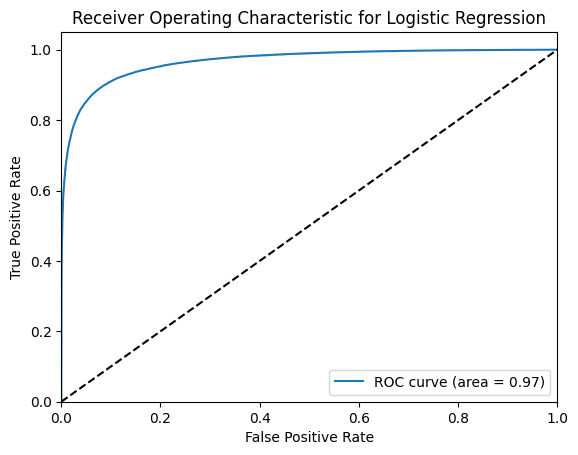

Logistic Regression - ROC AUC: 0.9665611390591424


In [14]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'filtered_mimicdata.csv'
df = pd.read_csv(file_path)

# Define features and target
features = ['anchor_age', 'gender', 'drug', 'race', 'careunit', 'icd_code', 'los']
target = 'hospital_expire_flag'

# Encode categorical features
label_encoders = {}
for col in ['gender', 'drug', 'race', 'careunit', 'icd_code']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df[features]
y = df[target]

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check the distribution after applying SMOTE
print("Target variable distribution after SMOTE:")
print(y_res.value_counts())

# Define preprocessor for numeric and categorical features
numeric_features = ['anchor_age', 'los']
categorical_features = ['gender', 'drug', 'race', 'careunit', 'icd_code']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Define the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Perform stratified sampling
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(X_res, y_res):
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Display ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print(f"Logistic Regression - ROC AUC: {roc_auc}")


for different race

Target variable distribution after SMOTE:
hospital_expire_flag
0    422622
1    422622
Name: count, dtype: int64

Modeling for race: 28


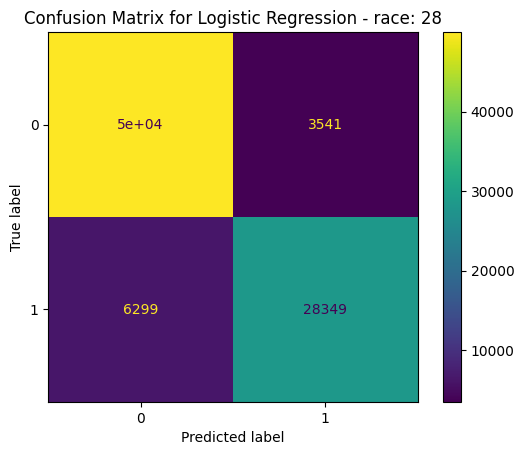

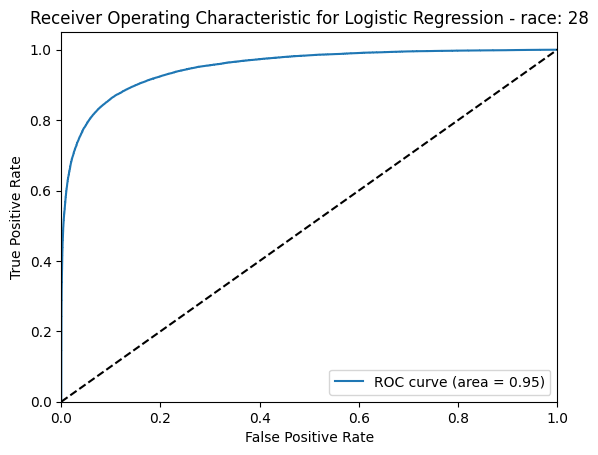

Logistic Regression - ROC AUC for race 28: 0.9507911082992141

Modeling for race: 22


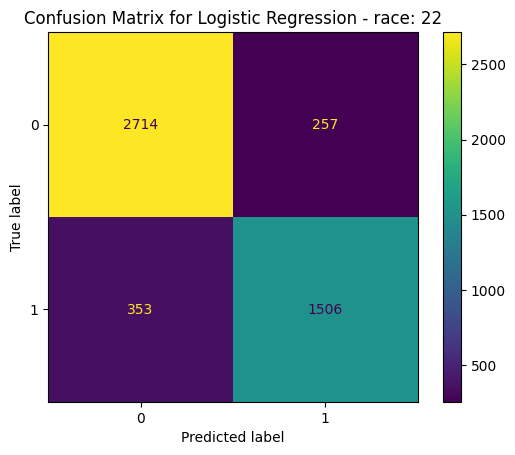

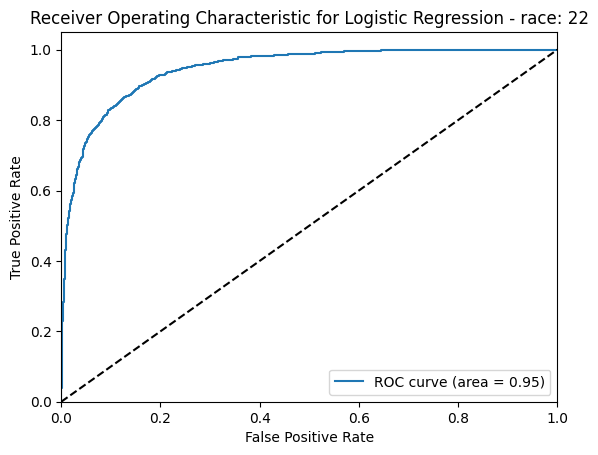

Logistic Regression - ROC AUC for race 22: 0.9452074735714018

Modeling for race: 7


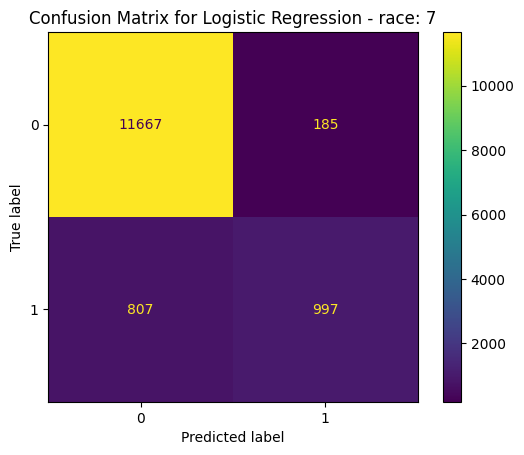

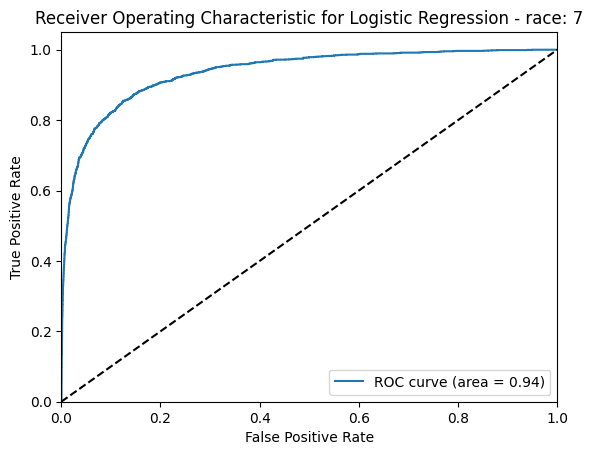

Logistic Regression - ROC AUC for race 7: 0.9367193539238187

Modeling for race: 26


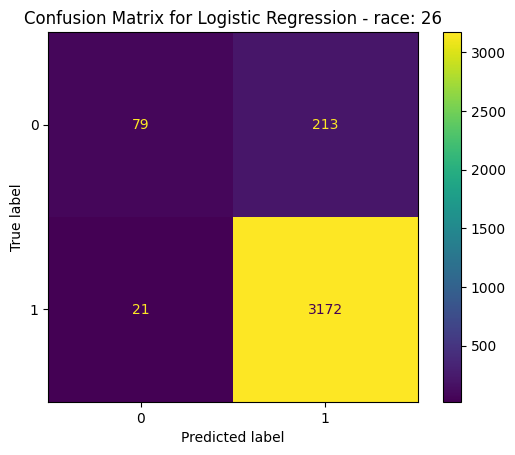

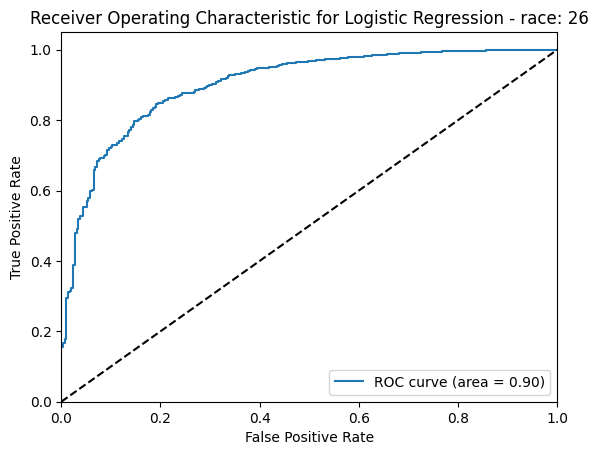

Logistic Regression - ROC AUC for race 26: 0.901652373127861

Modeling for race: 27


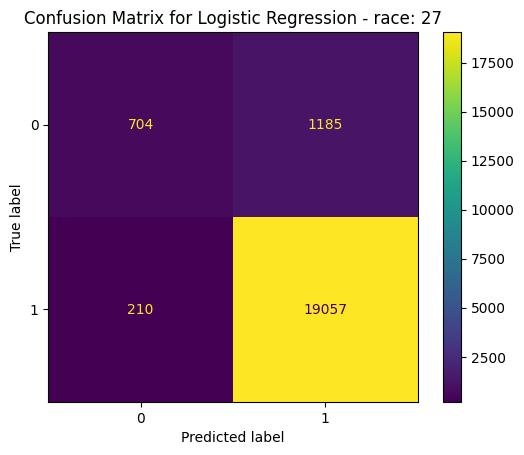

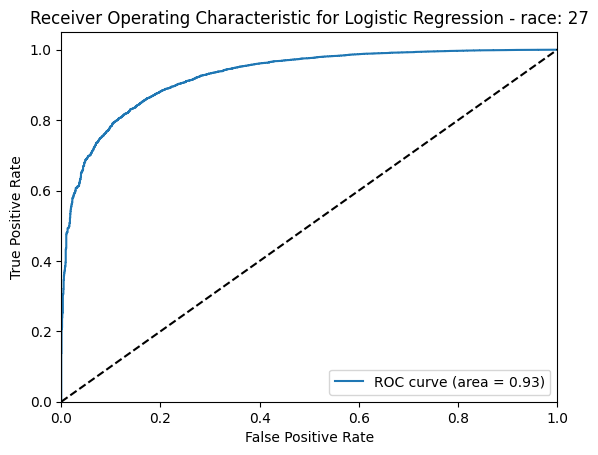

Logistic Regression - ROC AUC for race 27: 0.9266021333541858

Modeling for race: 32


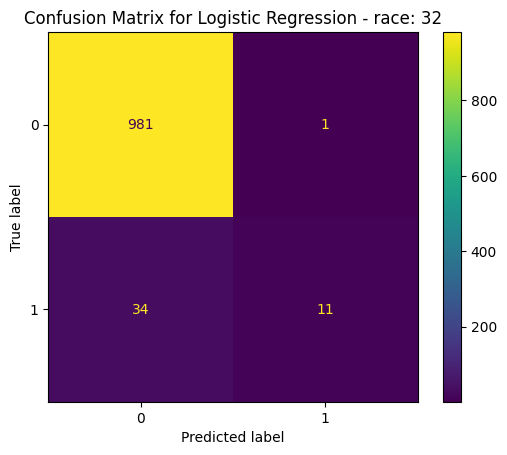

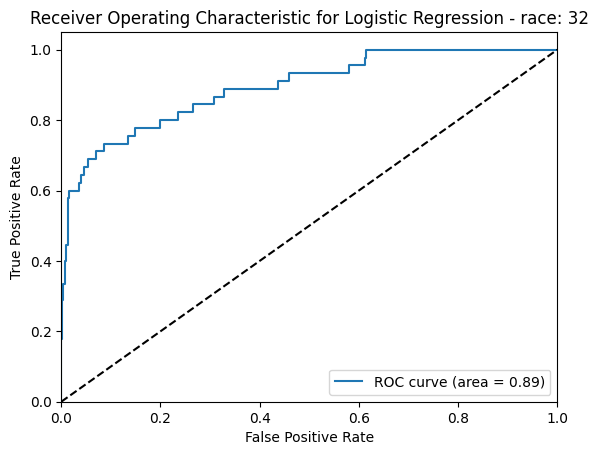

Logistic Regression - ROC AUC for race 32: 0.8930527268612809

Modeling for race: 24


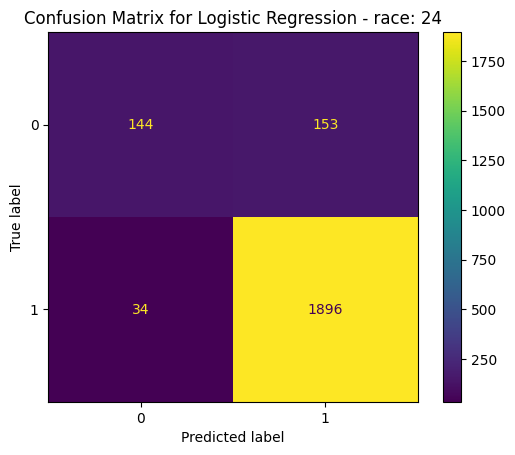

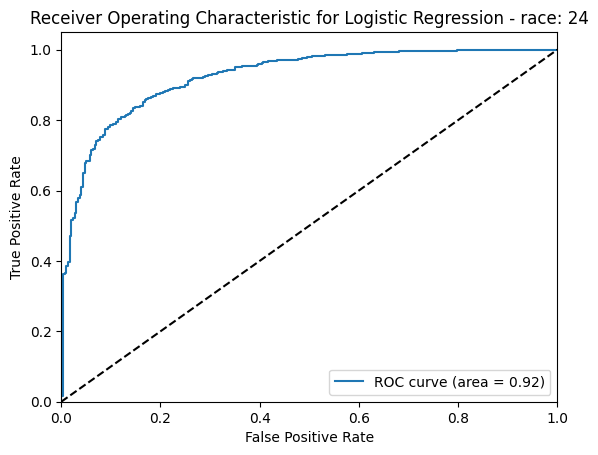

Logistic Regression - ROC AUC for race 24: 0.9235306432197624

Modeling for race: 31


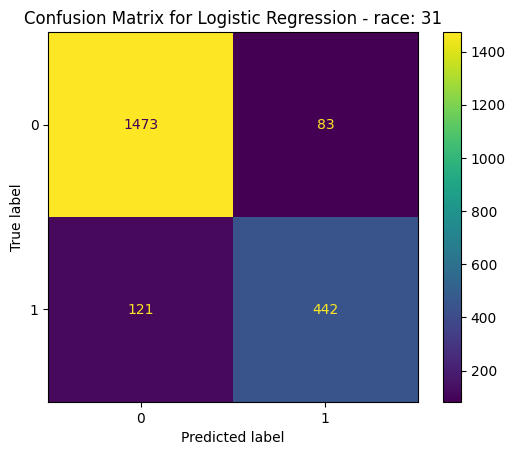

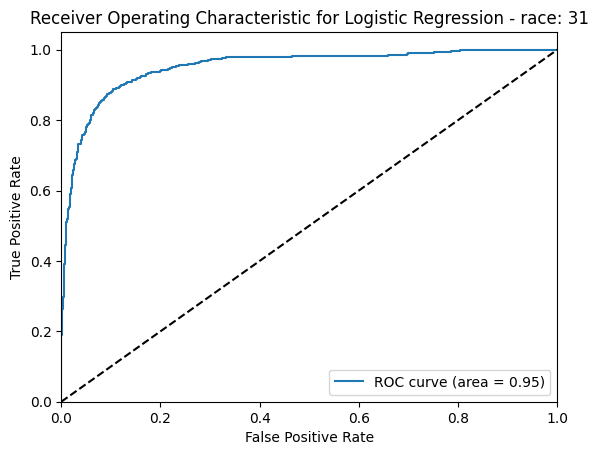

Logistic Regression - ROC AUC for race 31: 0.9507036304775646

Modeling for race: 8


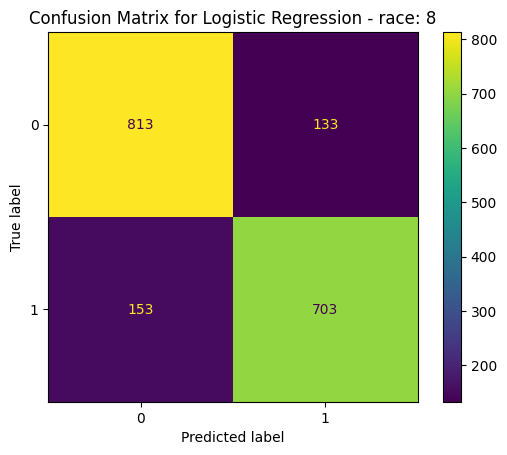

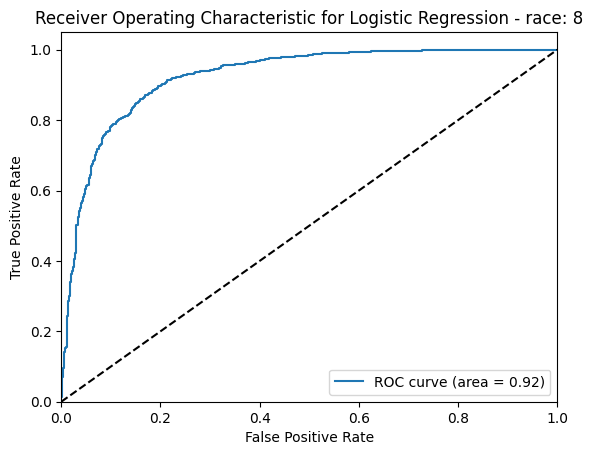

Logistic Regression - ROC AUC for race 8: 0.92278111477742

Modeling for race: 1


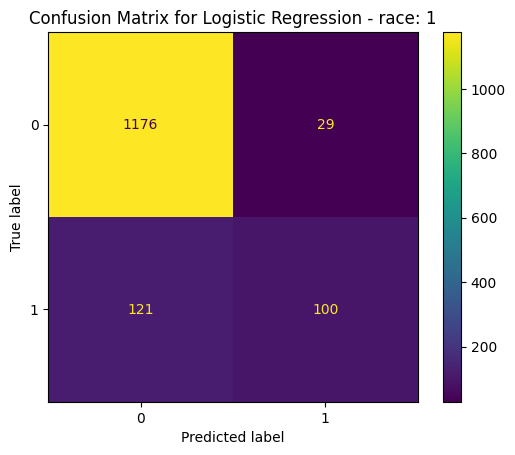

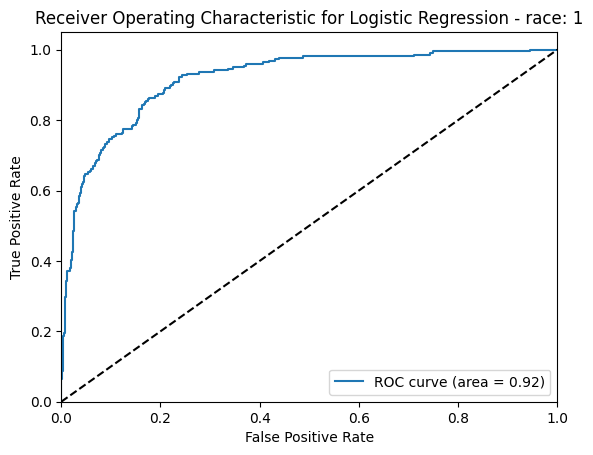

Logistic Regression - ROC AUC for race 1: 0.9167646120050318

Modeling for race: 3


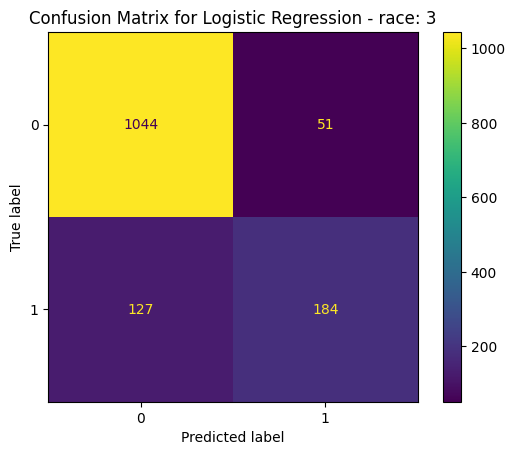

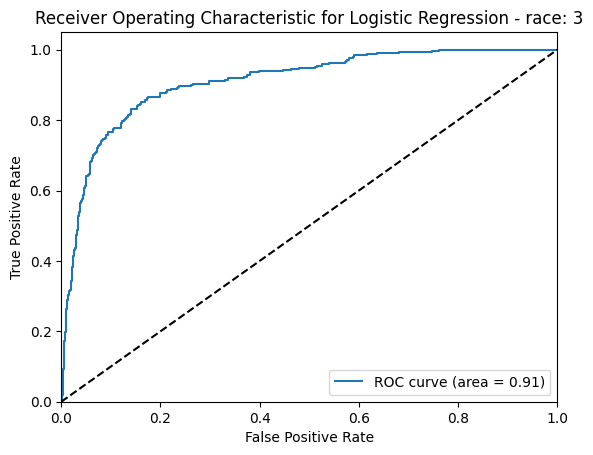

Logistic Regression - ROC AUC for race 3: 0.9084966744483108

Modeling for race: 14


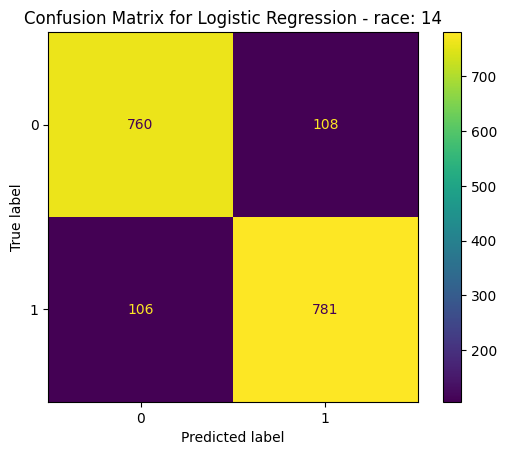

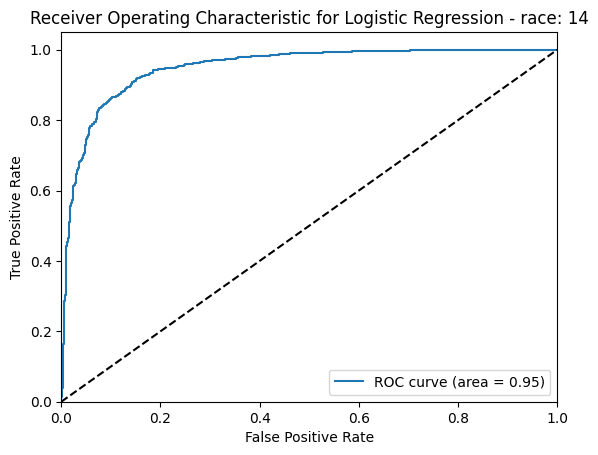

Logistic Regression - ROC AUC for race 14: 0.9487346671584952

Modeling for race: 19


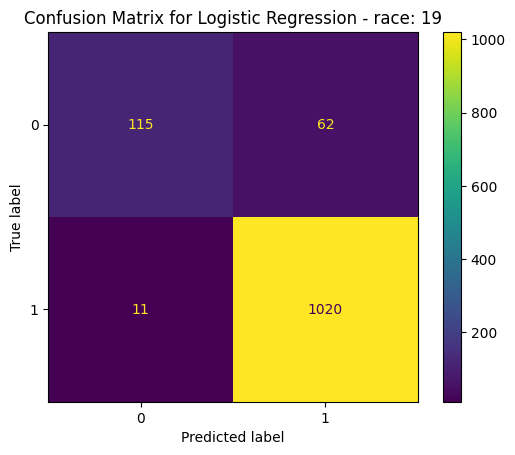

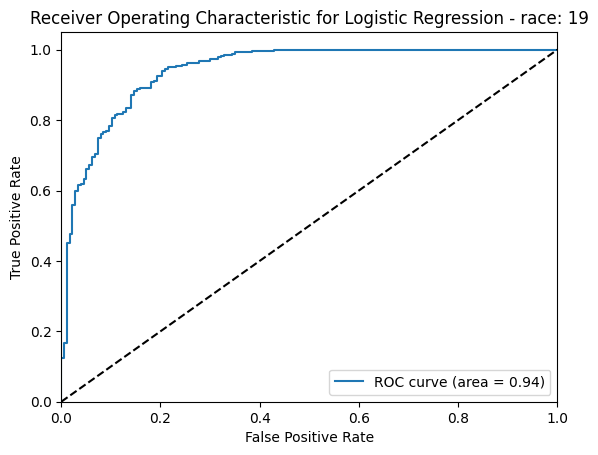

Logistic Regression - ROC AUC for race 19: 0.9404943913813039

Modeling for race: 18


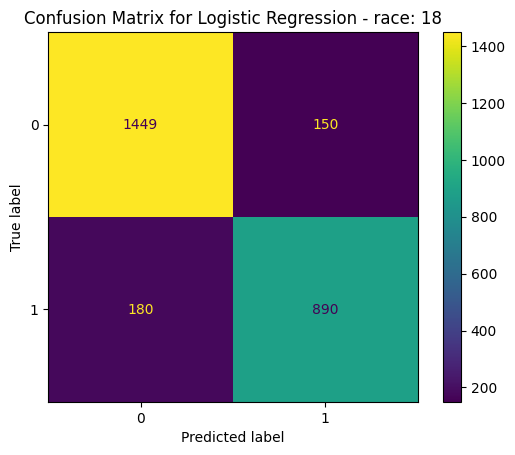

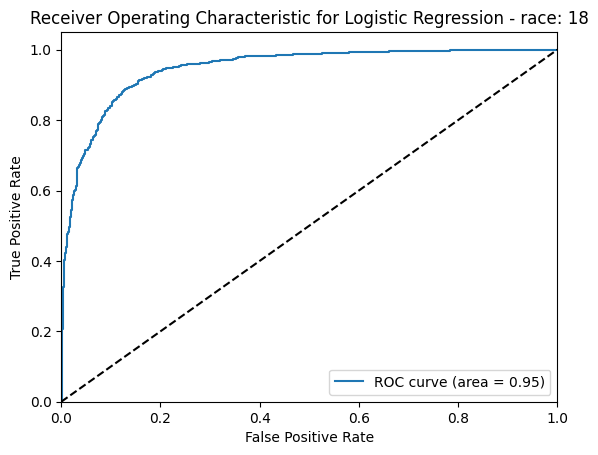

Logistic Regression - ROC AUC for race 18: 0.9457838719293017

Modeling for race: 15


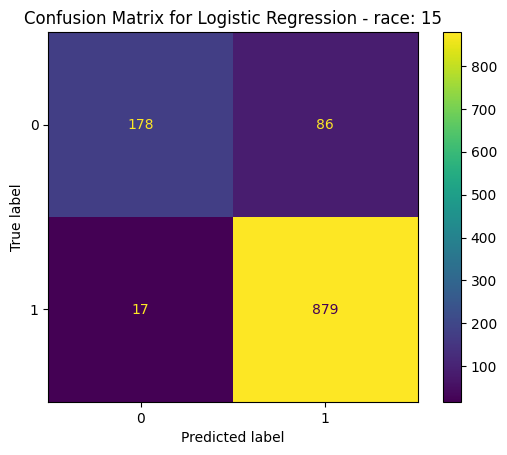

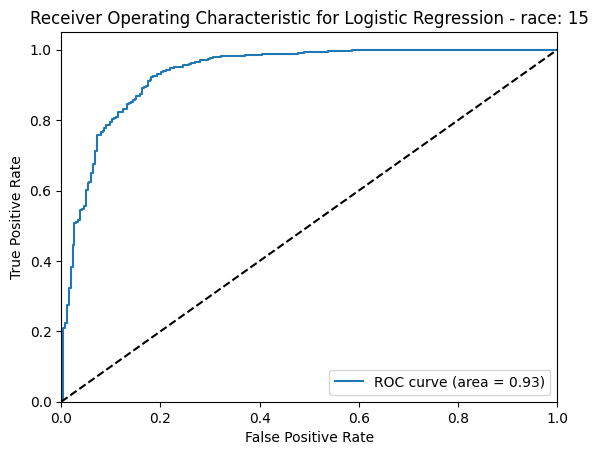

Logistic Regression - ROC AUC for race 15: 0.934278612012987

Modeling for race: 5


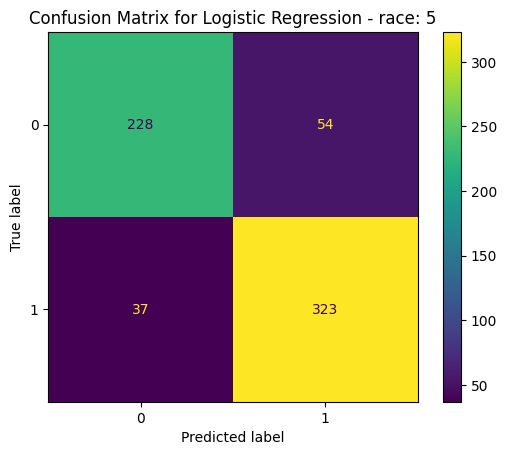

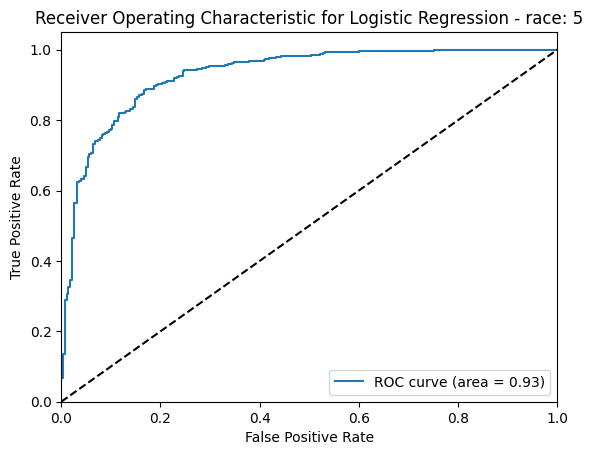

Logistic Regression - ROC AUC for race 5: 0.9300236406619385

Modeling for race: 29


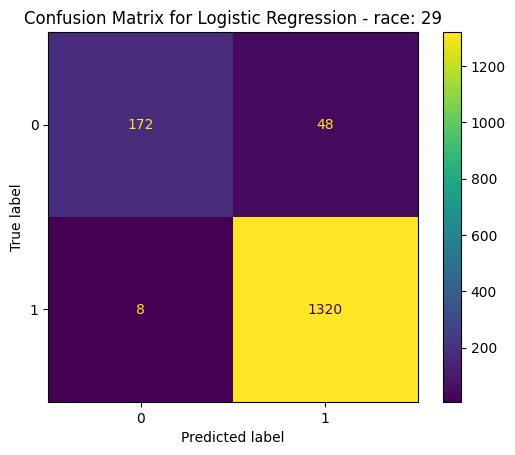

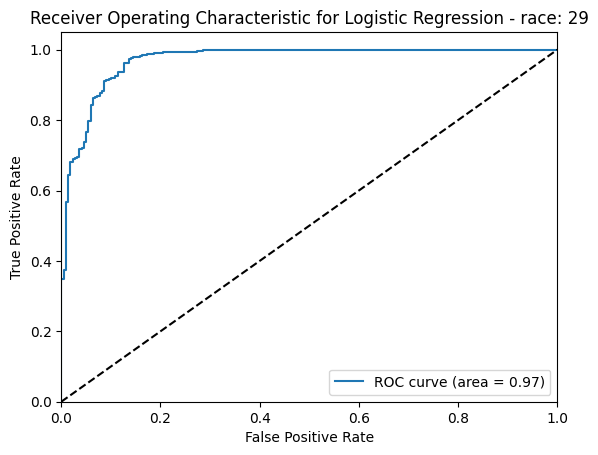

Logistic Regression - ROC AUC for race 29: 0.9706051478641841

Modeling for race: 10


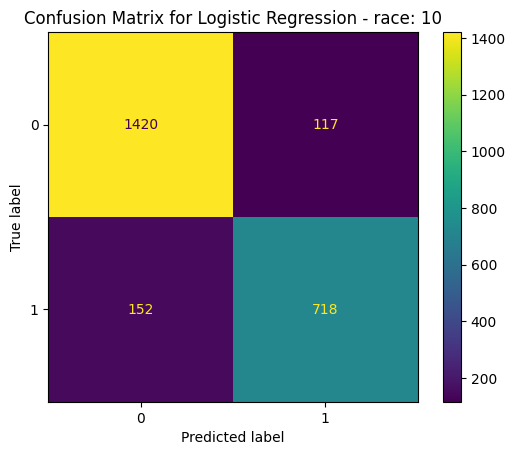

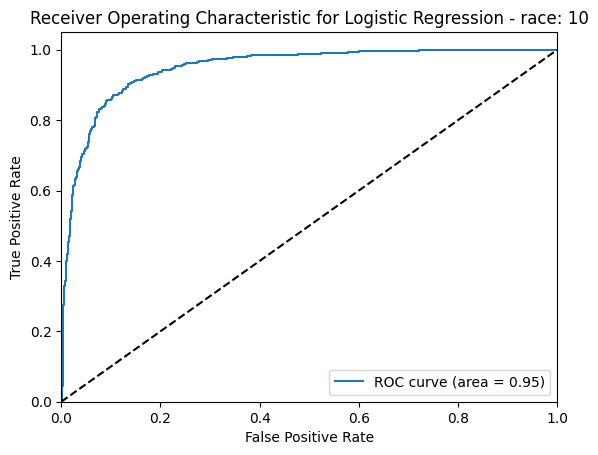

Logistic Regression - ROC AUC for race 10: 0.9478630561102013

Modeling for race: 6


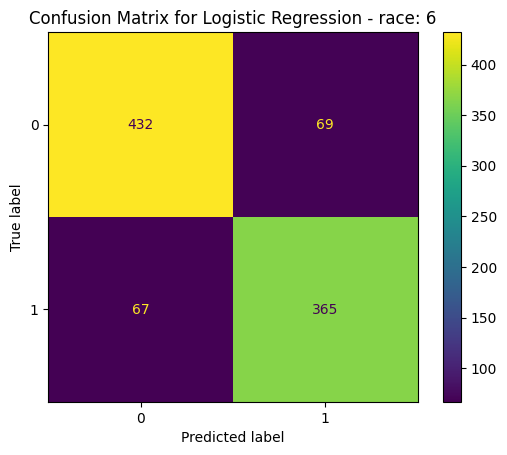

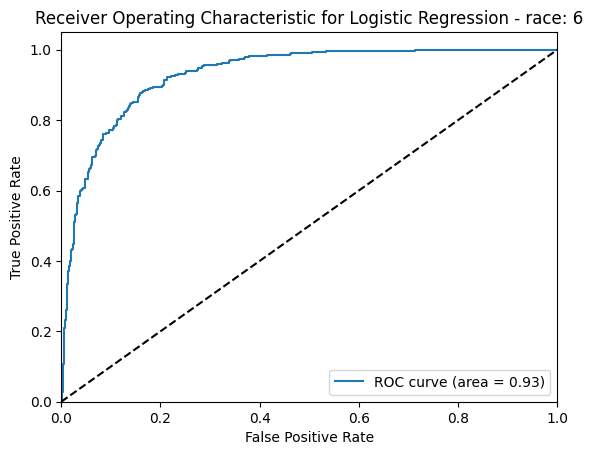

Logistic Regression - ROC AUC for race 6: 0.9303152953352555

Modeling for race: 21


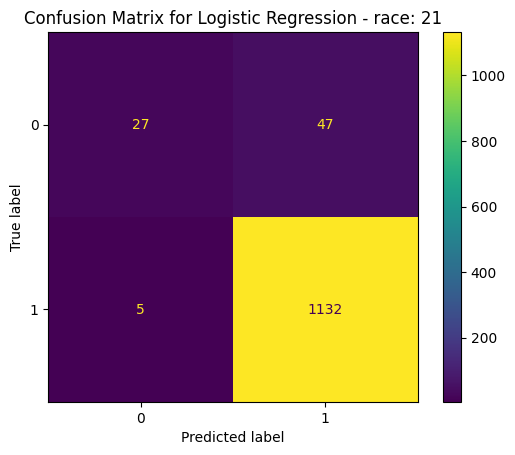

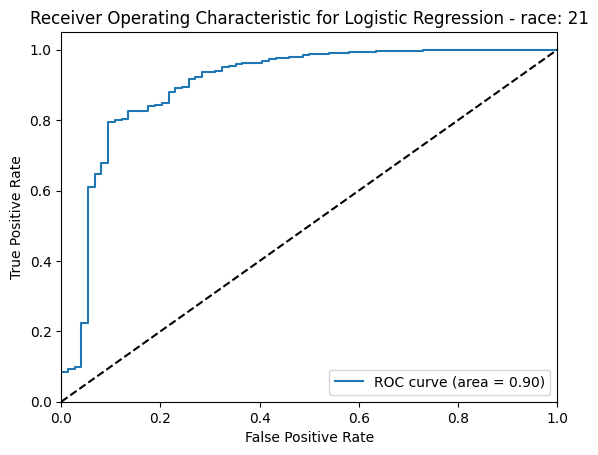

Logistic Regression - ROC AUC for race 21: 0.9005205733437923

Modeling for race: 9


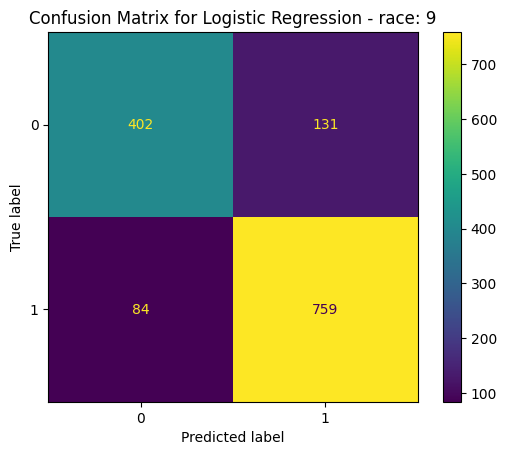

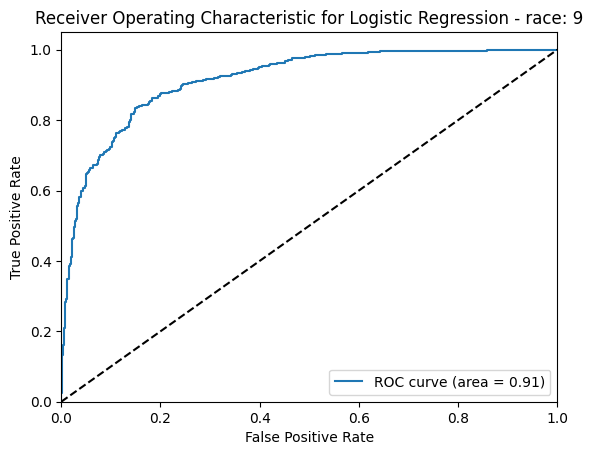

Logistic Regression - ROC AUC for race 9: 0.914408248927822

Modeling for race: 17


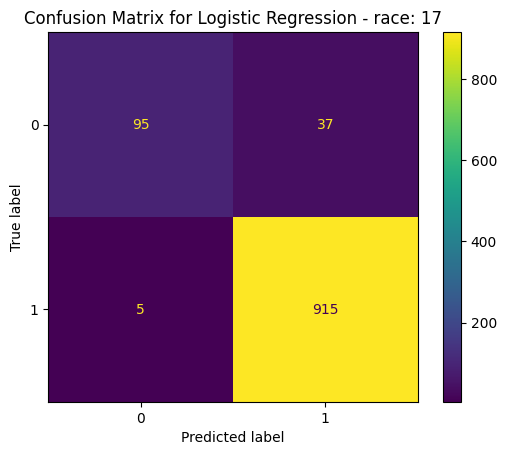

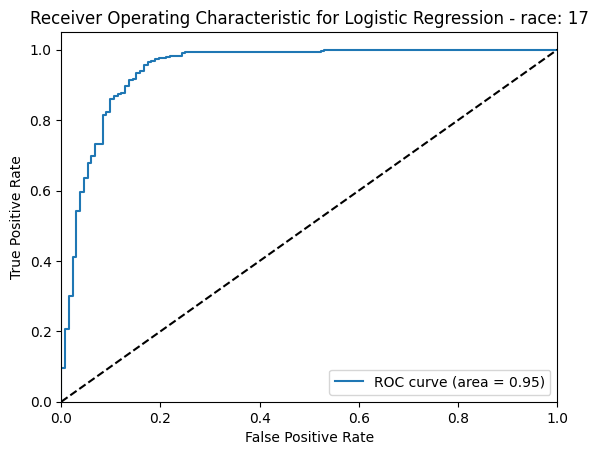

Logistic Regression - ROC AUC for race 17: 0.9459239130434782

Modeling for race: 23


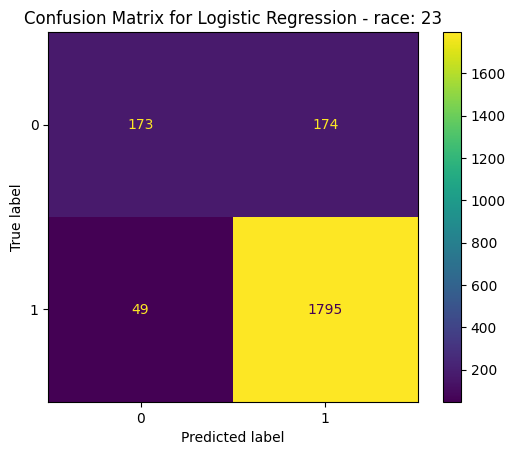

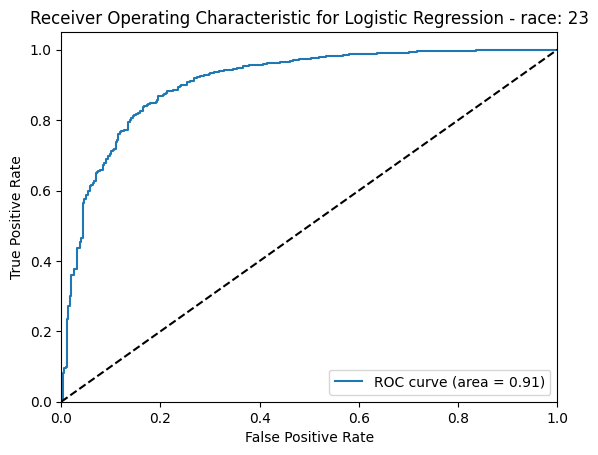

Logistic Regression - ROC AUC for race 23: 0.9070402020416711

Modeling for race: 13


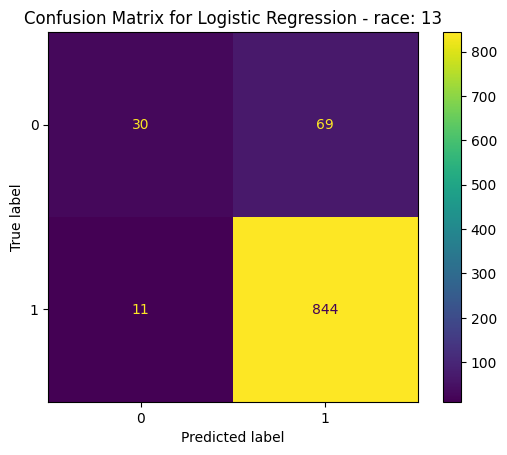

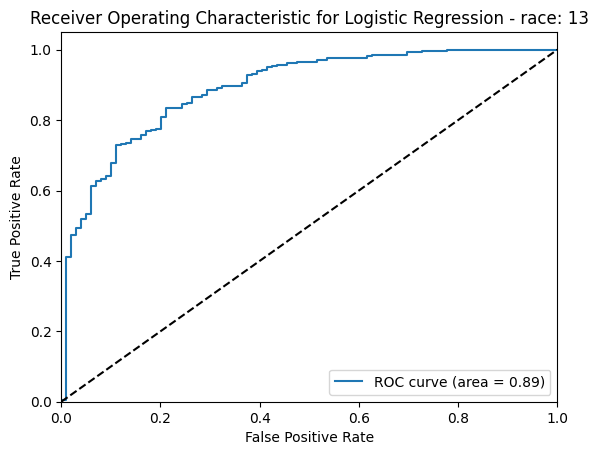

Logistic Regression - ROC AUC for race 13: 0.8896095457498967

Modeling for race: 0


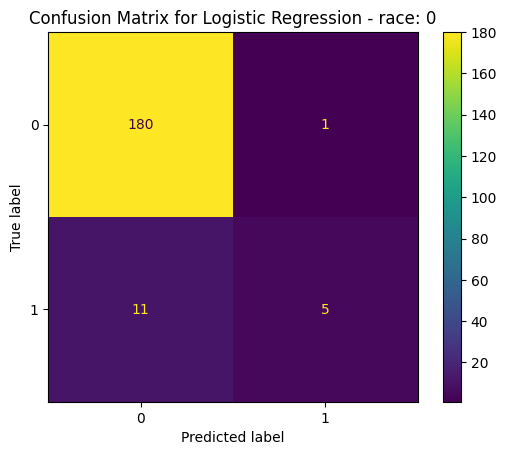

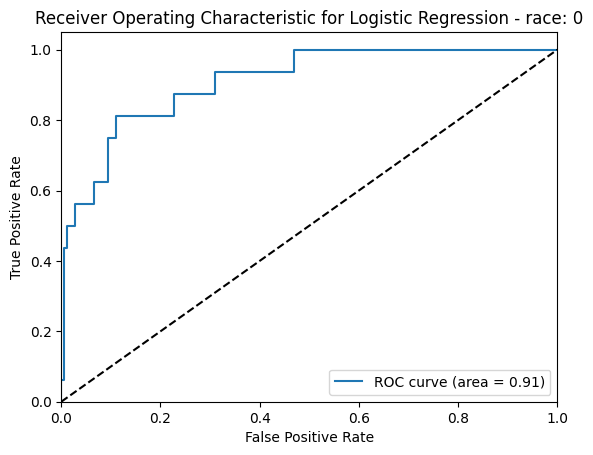

Logistic Regression - ROC AUC for race 0: 0.9098756906077348

Modeling for race: 20


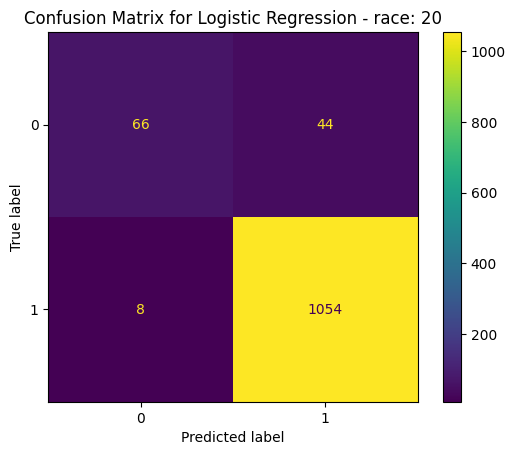

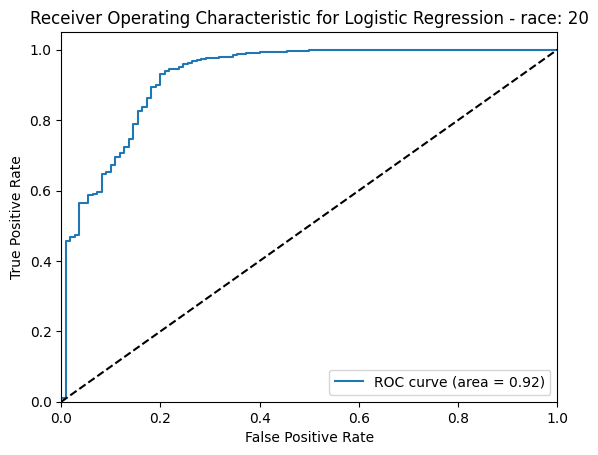

Logistic Regression - ROC AUC for race 20: 0.9229669577127204

Modeling for race: 30


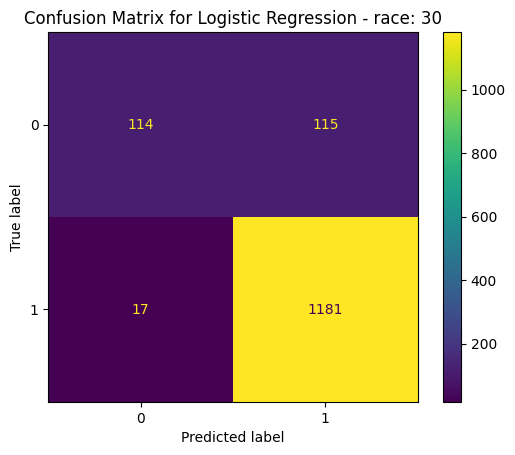

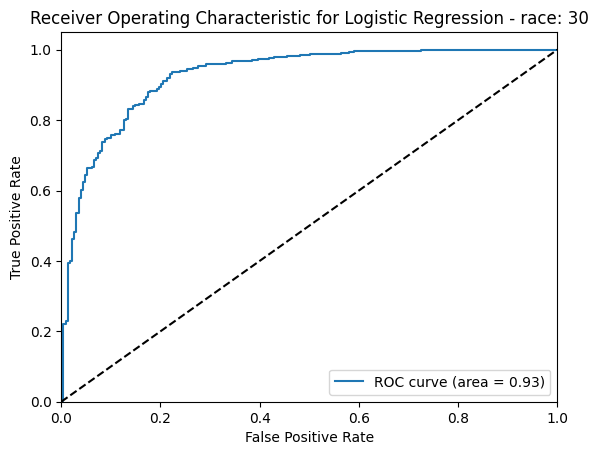

Logistic Regression - ROC AUC for race 30: 0.9259938325156192

Modeling for race: 4


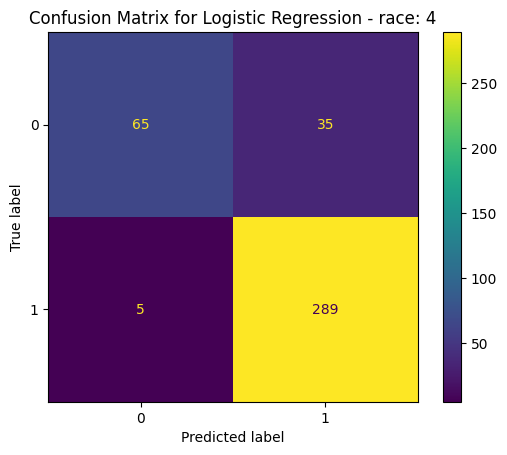

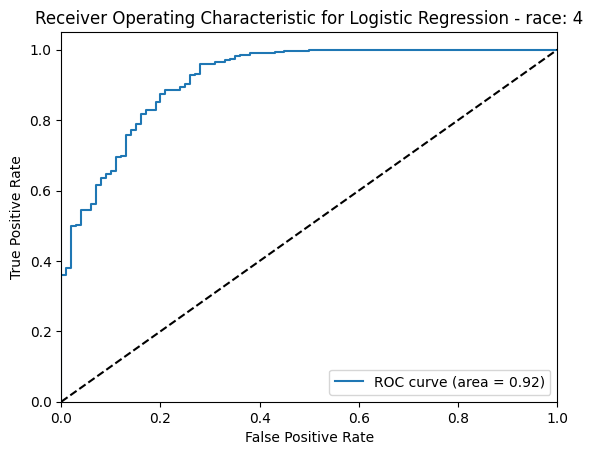

Logistic Regression - ROC AUC for race 4: 0.9179591836734693

Modeling for race: 16


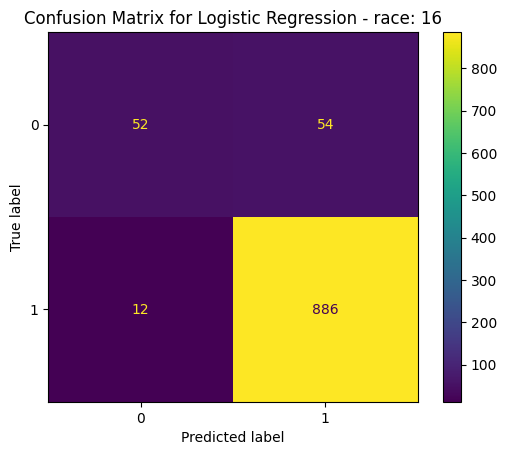

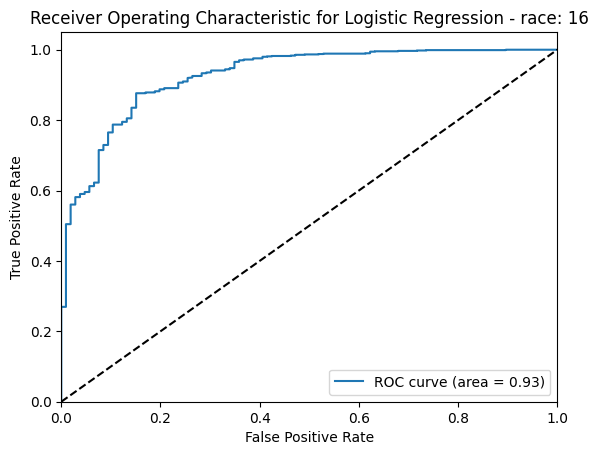

Logistic Regression - ROC AUC for race 16: 0.9257206790771946

Modeling for race: 2


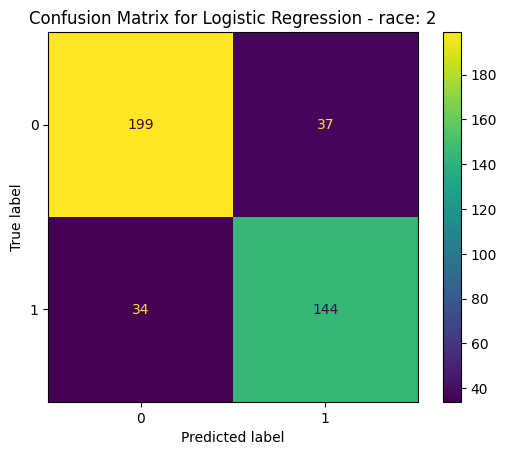

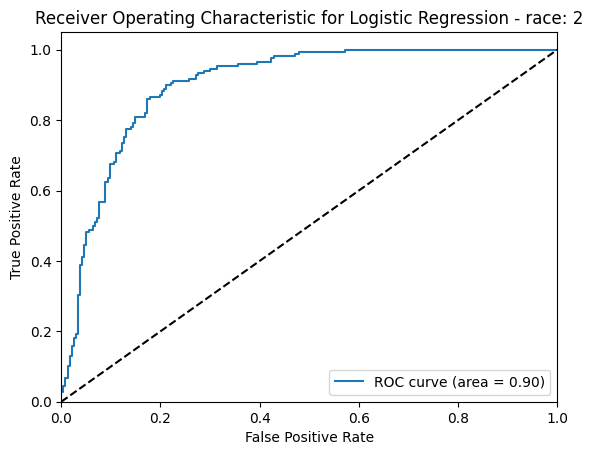

Logistic Regression - ROC AUC for race 2: 0.9007808036564464

Modeling for race: 12


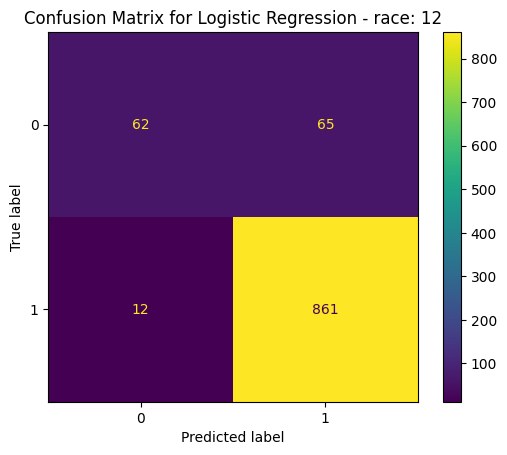

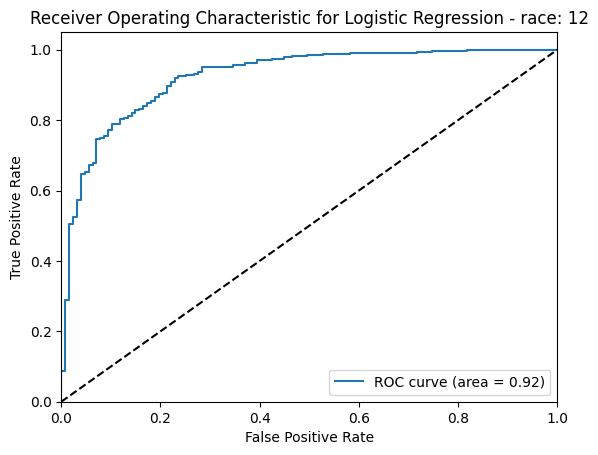

Logistic Regression - ROC AUC for race 12: 0.9235868712287253

Modeling for race: 11


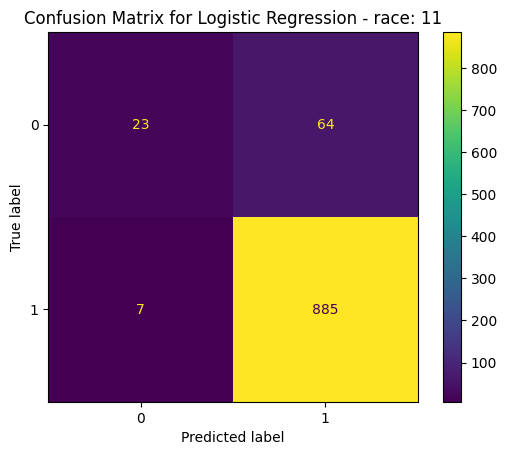

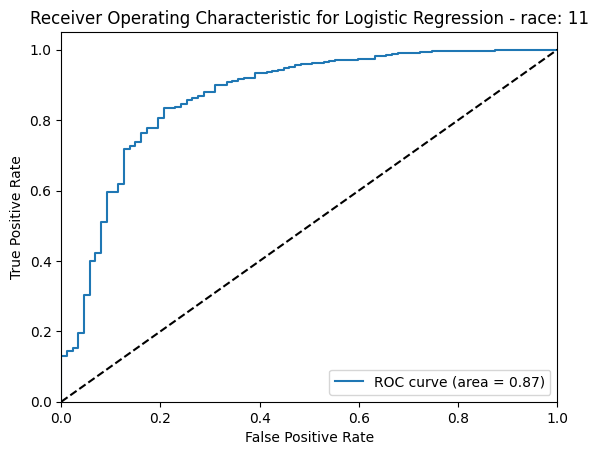

Logistic Regression - ROC AUC for race 11: 0.8667981031905572

Modeling for race: 25


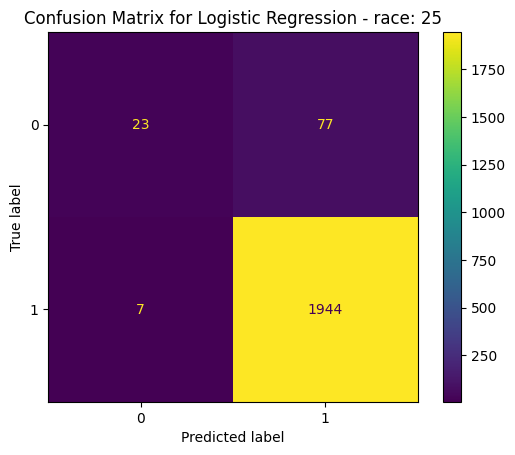

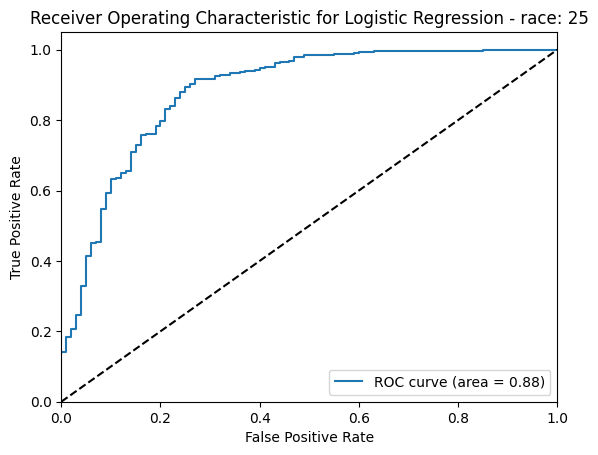

Logistic Regression - ROC AUC for race 25: 0.8812301383905689


In [15]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'filtered_mimicdata.csv'
df = pd.read_csv(file_path)

# Define features and target
features = ['anchor_age', 'gender', 'drug', 'race', 'careunit', 'icd_code', 'los']
target = 'hospital_expire_flag'

# Encode categorical features
label_encoders = {}
for col in ['gender', 'drug', 'race', 'careunit', 'icd_code']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df[features]
y = df[target]

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check the distribution after applying SMOTE
print("Target variable distribution after SMOTE:")
print(y_res.value_counts())

# Define preprocessor for numeric and categorical features
numeric_features = ['anchor_age', 'los']
categorical_features = ['gender', 'drug', 'race', 'careunit', 'icd_code']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Define the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Function to model for each stratum
def model_for_stratum(stratum_column, df):
    unique_strata = df[stratum_column].unique()
    results = []

    for stratum in unique_strata:
        print(f"\nModeling for {stratum_column}: {stratum}")
        stratum_mask = X_res[stratum_column] == stratum
        X_stratum = X_res[stratum_mask]
        y_stratum = y_res[stratum_mask]

        if len(X_stratum) < 10:
            print(f"Skipping {stratum_column} {stratum} due to insufficient data.")
            continue

        # Perform stratified sampling within each stratum
        stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
        for train_index, test_index in stratified_split.split(X_stratum, y_stratum):
            X_train, X_test = X_stratum.iloc[train_index], X_stratum.iloc[test_index]
            y_train, y_test = y_stratum.iloc[train_index], y_stratum.iloc[test_index]

        # Create a pipeline with preprocessing and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Predict on the test set
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

        # Calculate metrics
        cm = confusion_matrix(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Display confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f'Confusion Matrix for Logistic Regression - {stratum_column}: {stratum}')
        plt.show()

        # Display ROC curve
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for Logistic Regression - {stratum_column}: {stratum}')
        plt.legend(loc="lower right")
        plt.show()

        print(f"Logistic Regression - ROC AUC for {stratum_column} {stratum}: {roc_auc}")
        results.append((stratum, roc_auc))

    return results

# Apply the function for 'race' stratum
race_results = model_for_stratum('race', df)


Target variable distribution after SMOTE:
hospital_expire_flag
0    422622
1    422622
Name: count, dtype: int64

Modeling for race: 28
Logistic Regression - ROC AUC for race 28: 0.9507911082992141

Modeling for race: 22
Logistic Regression - ROC AUC for race 22: 0.9452074735714018

Modeling for race: 7
Logistic Regression - ROC AUC for race 7: 0.9367193539238187

Modeling for race: 26
Logistic Regression - ROC AUC for race 26: 0.901652373127861

Modeling for race: 27
Logistic Regression - ROC AUC for race 27: 0.9266021333541858

Modeling for race: 32
Logistic Regression - ROC AUC for race 32: 0.8930527268612809

Modeling for race: 24
Logistic Regression - ROC AUC for race 24: 0.9235306432197624

Modeling for race: 31
Logistic Regression - ROC AUC for race 31: 0.9507036304775646

Modeling for race: 8
Logistic Regression - ROC AUC for race 8: 0.92278111477742

Modeling for race: 1
Logistic Regression - ROC AUC for race 1: 0.9167646120050318

Modeling for race: 3
Logistic Regression - RO

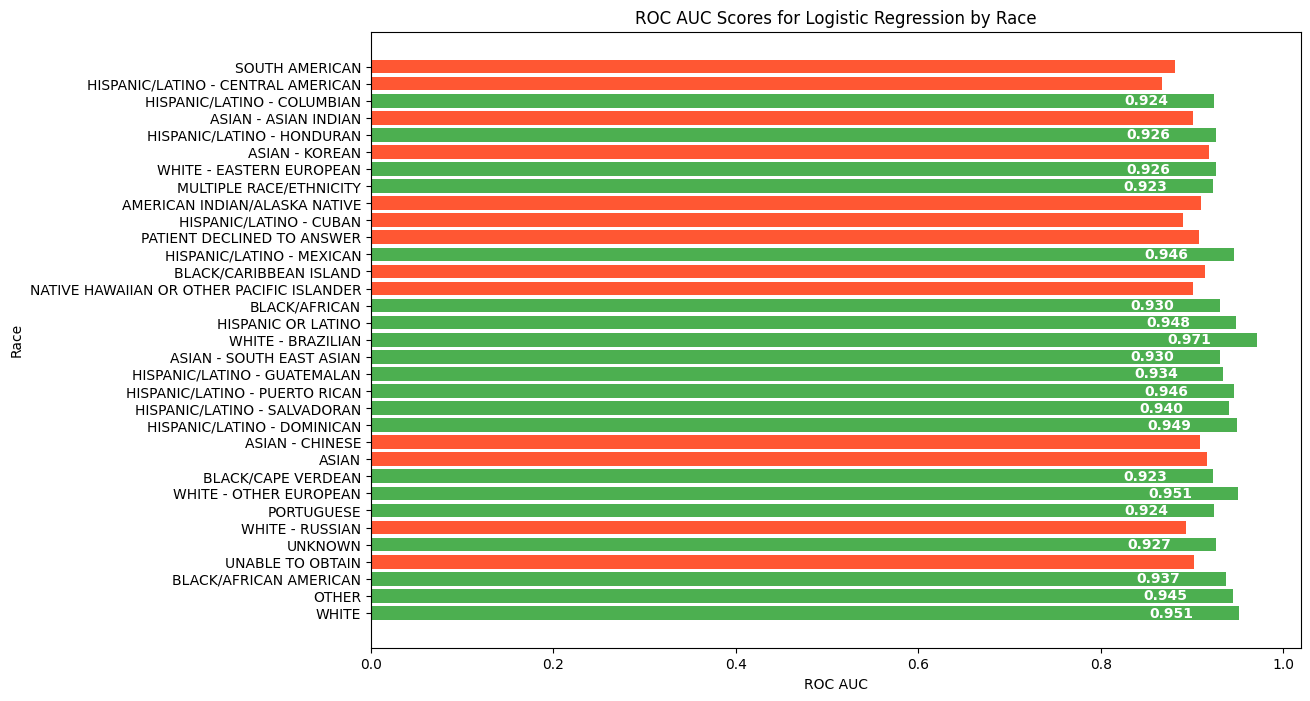

In [18]:

# Define features and target
features = ['anchor_age', 'gender', 'drug', 'race', 'careunit', 'icd_code', 'los']
target = 'hospital_expire_flag'

# Encode categorical features
label_encoders = {}
for col in ['gender', 'drug', 'race', 'careunit', 'icd_code']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df[features]
y = df[target]

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check the distribution after applying SMOTE
print("Target variable distribution after SMOTE:")
print(y_res.value_counts())

# Save the resampled dataset to a new CSV file
resampled_df = pd.concat([X_res, y_res], axis=1)
resampled_df.to_csv('resampled_mimicdata.csv', index=False)

# Define preprocessor for numeric and categorical features
numeric_features = ['anchor_age', 'los']
categorical_features = ['gender', 'drug', 'race', 'careunit', 'icd_code']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Initialize the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Unique races
unique_races = df['race'].unique()

# Store ROC AUC scores
roc_auc_scores = []

for race in unique_races:
    print(f"\nModeling for race: {race}")
    race_mask = X_res['race'] == race
    X_race = X_res[race_mask]
    y_race = y_res[race_mask]

    if len(X_race) < 10:
        print(f"Skipping race {race} due to insufficient data.")
        continue

    # Perform stratified sampling within each race stratum
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in stratified_split.split(X_race, y_race):
        X_train, X_test = X_race.iloc[train_index], X_race.iloc[test_index]
        y_train, y_test = y_race.iloc[train_index], y_race.iloc[test_index]

    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', logistic_regression)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"Logistic Regression - ROC AUC for race {race}: {roc_auc}")

    # Store the result
    roc_auc_scores.append((race, roc_auc))

# Convert to DataFrame for easy plotting
roc_auc_df = pd.DataFrame(roc_auc_scores, columns=['Race', 'ROC AUC'])

# Define race names
race_names = [
    'AMERICAN INDIAN/ALASKA NATIVE', 'ASIAN', 'ASIAN - ASIAN INDIAN', 'ASIAN - CHINESE',
    'ASIAN - KOREAN', 'ASIAN - SOUTH EAST ASIAN', 'BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN',
    'BLACK/CAPE VERDEAN', 'BLACK/CARIBBEAN ISLAND', 'HISPANIC OR LATINO',
    'HISPANIC/LATINO - CENTRAL AMERICAN', 'HISPANIC/LATINO - COLUMBIAN', 'HISPANIC/LATINO - CUBAN',
    'HISPANIC/LATINO - DOMINICAN', 'HISPANIC/LATINO - GUATEMALAN', 'HISPANIC/LATINO - HONDURAN',
    'HISPANIC/LATINO - MEXICAN', 'HISPANIC/LATINO - PUERTO RICAN', 'HISPANIC/LATINO - SALVADORAN',
    'MULTIPLE RACE/ETHNICITY', 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'OTHER',
    'PATIENT DECLINED TO ANSWER', 'PORTUGUESE', 'SOUTH AMERICAN', 'UNABLE TO OBTAIN',
    'UNKNOWN', 'WHITE', 'WHITE - BRAZILIAN', 'WHITE - EASTERN EUROPEAN', 'WHITE - OTHER EUROPEAN',
    'WHITE - RUSSIAN'
]

# Map race IDs to names
roc_auc_df['Race'] = roc_auc_df['Race'].map(dict(enumerate(race_names)))

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(roc_auc_df['Race'], roc_auc_df['ROC AUC'], color=['#4CAF50' if x >= 0.92 else '#FF5733' for x in roc_auc_df['ROC AUC']])
plt.xlabel('ROC AUC')
plt.ylabel('Race')
plt.title('ROC AUC Scores for Logistic Regression by Race')

# Highlight the high-performing races
for bar in bars:
    width = bar.get_width()
    if width >= 0.92:
        plt.gca().text(width - 0.05, bar.get_y() + bar.get_height() / 2, f'{width:.3f}', ha='right', va='center', color='white', weight='bold')

plt.show()


### Conclusion

Based on the ROC AUC scores from the logistic regression model for each race, the races that performed well (with ROC AUC scores above 0.92) are:

- **White - Brazilian (Race ID: 29)**: ROC AUC = ![0.971](https://via.placeholder.com/15/FFFF00/000000?text=0.971)
- **White - Other European (Race ID: 31)**: ROC AUC = ![0.951](https://via.placeholder.com/15/FFFF00/000000?text=0.951)
- **White (Race ID: 28)**: ROC AUC = ![0.951](https://via.placeholder.com/15/FFFF00/000000?text=0.951)
- **Hispanic/Latino - Dominican (Race ID: 14)**: ROC AUC = ![0.949](https://via.placeholder.com/15/FFFF00/000000?text=0.949)
- **Hispanic/Latino - Mexican (Race ID: 17)**: ROC AUC = ![0.946](https://via.placeholder.com/15/FFFF00/000000?text=0.946)
- **Hispanic/Latino - Puerto Rican (Race ID: 18)**: ROC AUC = ![0.946](https://via.placeholder.com/15/FFFF00/000000?text=0.946)
- **Hispanic/Latino - Central American (Race ID: 22)**: ROC AUC = ![0.945](https://via.placeholder.com/15/FFFF00/000000?text=0.945)

These races showed the highest predictive accuracy for the logistic regression model based on the ROC AUC scores.
